In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt;  

In [25]:
TRAINING_STEPS = 100
decay_rate = 0.96
decay_steps = 10
global_step = tf.Variable(0)
# decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
# exponential_decay(learning_rate, global_step, decay_steps, decay_rate, staircase=False, name=None)
# decayed_learning_rate 为每一轮优化时 使用的学习率
# learning_rate 事先设置的初始化学习率
# decay_rate 衰减系数
# decay_steps 衰减系数
# global_step: A scalar `int32` or `int64` `Tensor` or a Python number.
#      Global step to use for the decay computation.  Must not be negative.
# global_step: Optional `Variable` to increment by one after the
#         variables have been updated.
# LEARNING_RATE 中的global_step 初始值为0 通过minimize 进行 自增长 中的global_step
LEARNING_RATE1 = tf.train.exponential_decay(0.1, global_step, decay_steps, decay_rate, staircase=True)

x = tf.Variable(tf.constant(5, dtype=tf.float32), name="x")
y = tf.square(x)
train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(y, global_step=global_step)

In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(TRAINING_STEPS):
        sess.run(train_op)
        if i % 10 == 0:
            LEARNING_RATE_value = sess.run(LEARNING_RATE)
            x_value = sess.run(x)
            print('global_step：', sess.run(global_step))
            print("After %s iteration(s): x%s is %f, learning rate is %f." % (i + 1, i + 1, x_value, LEARNING_RATE_value))

global_step： 1
After 1 iteration(s): x1 is 4.000000, learning rate is 0.100000.
global_step： 11
After 11 iteration(s): x11 is 0.429497, learning rate is 0.100000.
global_step： 21
After 21 iteration(s): x21 is 0.046117, learning rate is 0.100000.
global_step： 31
After 31 iteration(s): x31 is 0.004952, learning rate is 0.100000.
global_step： 41
After 41 iteration(s): x41 is 0.000532, learning rate is 0.100000.
global_step： 51
After 51 iteration(s): x51 is 0.000057, learning rate is 0.100000.
global_step： 61
After 61 iteration(s): x61 is 0.000006, learning rate is 0.100000.
global_step： 71
After 71 iteration(s): x71 is 0.000001, learning rate is 0.100000.
global_step： 81
After 81 iteration(s): x81 is 0.000000, learning rate is 0.100000.
global_step： 91
After 91 iteration(s): x91 is 0.000000, learning rate is 0.100000.


In [23]:

LEARNING_RATE2 = tf.train.exponential_decay(0.1, global_step, decay_steps, decay_rate, staircase=True)
LEARNING_RATE3 = tf.train.exponential_decay(0.1, global_step, decay_steps, decay_rate, staircase=False)


f_c = []
f_d = []
with tf.Session() as sess:
    for i in range(TRAINING_STEPS):
        c = sess.run(LEARNING_RATE2,feed_dict={global_step:i})
        f_c.append(c)
        d = sess.run(LEARNING_RATE3,feed_dict={global_step:i})
        f_d.append(d)

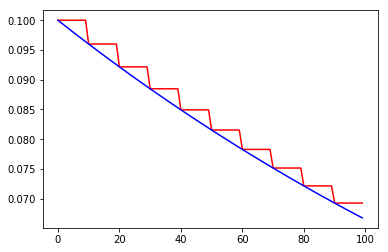

In [24]:
plt.figure(1)
plt.plot(range(TRAINING_STEPS),f_c, 'r-')  
plt.plot(range(TRAINING_STEPS),f_d, 'b-')
plt.show()  

In [45]:
import tensorflow as tf

w = tf.constant([[1.0 , -2.0 ],[-3.0 , 4.0]])
loss = tf.contrib.layers.l2_regularizer(0.5)(w)
with tf.Session() as sess:
    print(sess.run(loss))

7.5
